In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [266]:
# loading the dataset
df = pd.read_csv("SpotifyFeatures.csv")

In [267]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [269]:
df.shape

(232725, 18)

In [270]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [271]:
df.duplicated().sum()

0

In [272]:
df.drop(columns= ['track_id'],inplace=True)

In [273]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [274]:
len(df['artist_name'].unique())

14564

In [275]:
df['artist_name'].unique()

array(['Henri Salvador', 'Martin & les fées', 'Joseph Williams', ...,
       'Dharmasoul', 'Swim', 'Jr Thomas & The Volcanos'], dtype=object)

In [276]:
len(df['track_name'].unique())

148615

In [277]:
df['track_name'].unique()

array(["C'est beau de faire un Show", "Perdu d'avance (par Gad Elmaleh)",
       "Don't Let Me Be Lonely Tonight", ..., 'P.O.P.', 'Burning Fire',
       "You Don't Have To Hurt No More"], dtype=object)

In [289]:
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [290]:
df['key'].unique()

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

In [278]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [279]:
sorted_df = df.sort_values(by='popularity',ascending=True).head(10)
sorted_df

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.6110,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
74954,Children's Music,Sing n Play,"See, See My Playmate",0,0.1390,0.556,150487,0.4390,0.006400,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820
74958,Children's Music,Children Songs Company,By the God - Instrumental,0,0.2130,0.736,212547,0.4460,0.821000,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,0,0.0131,0.639,184000,0.8440,0.095700,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271
74961,Children's Music,Children Songs Company,Breeze,0,0.0280,0.607,147653,0.5540,0.000000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404
74962,Children's Music,Children Songs Company,Woodland,0,0.9950,0.529,266067,0.1540,0.414000,B,0.1230,-9.222,Minor,0.0470,69.588,4/4,0.332
74963,Children's Music,Children Songs Company,Cool Me - Instrumental,0,0.2500,0.623,350080,0.4710,0.931000,A#,0.2580,-8.675,Major,0.0332,120.015,4/4,0.515
74964,Children's Music,Sing n Play,The Tortoise and the Hare,0,0.4960,0.563,201362,0.3460,0.000000,D,0.1200,-14.058,Major,0.0938,144.642,4/4,0.370
56153,Movie,Bruno Pelletier,Lié par le sang,0,0.0294,0.656,276027,0.6940,0.000017,A,0.0527,-6.755,Major,0.0273,120.085,4/4,0.449
74966,Children's Music,Children Songs Company,Forsaken,0,0.9940,0.429,129387,0.0382,0.000000,B,0.4480,-12.704,Major,0.0557,156.807,3/4,0.474


In [280]:
popular_df =df.query('popularity>90',inplace=False).sort_values(by='popularity',ascending=False)
popular_df[0:10]

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
138918,Reggaeton,Daddy Yankee,Con Calma,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
66643,Hip-Hop,Daddy Yankee,Con Calma,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


In [281]:
popular_df.shape[0]

107

In [282]:
df['duration_s'] = df['duration_ms'].apply(lambda x: round(x/1000))

In [283]:
df.head(15)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270,152
4,Movie,Fabien Nataf,Ouverture,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900,83
5,Movie,Henri Salvador,Le petit souper aux chandelles,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580,161
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330,212
7,Movie,Laura Mayne,Let Me Let Go,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740,240
8,Movie,Chorus,Helka,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650,226
9,Movie,Le Club des Juniors,Les bisous des bisounours,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180,153


In [284]:
df.sample(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
109071,Pop,CNCO,Llegaste Tú,81,0.153000,0.702,190916,0.914,0.000000,G,0.0625,-2.934,Minor,0.0376,96.991,4/4,0.563,191
188482,Ska,Less Than Jake,Summon Monsters,17,0.000301,0.363,162427,0.977,0.010400,C#,0.1290,-4.420,Minor,0.1620,193.933,4/4,0.557,162
70055,Hip-Hop,Tay-K,Saran Pack,59,0.043200,0.781,70000,0.731,0.000000,G#,0.0454,-8.300,Major,0.2260,139.977,4/4,0.139,70
127946,Classical,Jascha Heifetz,"Londonderry Air, ""Farewell to Cucullain"" (arr....",35,0.985000,0.214,271240,0.144,0.440000,C,0.1110,-18.344,Major,0.0365,102.714,4/4,0.122,271
225529,Rock,Cole Swindell,Somebody's Been Drinkin',57,0.016900,0.481,225267,0.775,0.000014,C,0.0978,-5.494,Major,0.0597,136.035,4/4,0.273,225


In [285]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'duration_s'],
      dtype='object')

In [286]:
df.drop(columns=['duration_ms'],inplace=True)

In [287]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,152
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,83


In [311]:
df.select_dtypes(include='object').columns

Index(['genre', 'artist_name', 'track_name', 'key', 'mode', 'time_signature'], dtype='object')

In [306]:
corr_df = df.drop(columns=['genre','artist_name','track_name','key','mode','time_signature'],axis=1).corr(method='pearson')

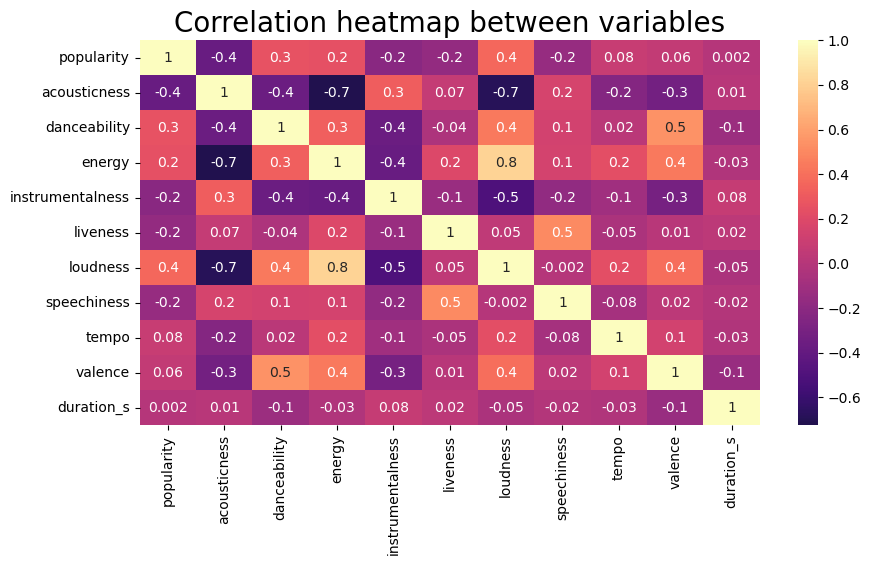

In [354]:
# correlations between different audio features
plt.figure(figsize=(10,5))
sns.heatmap(data=corr_df,annot=True,fmt='.1g',center=0,cmap='magma')
plt.title("Correlation heatmap between variables",size=20)
plt.show()

In [372]:
sample_df = df.sample(int(0.004*len(df)))

In [373]:
len(sample_df)

930

Text(0.5, 1.0, 'Correlation bewteen loudness vs Energy')

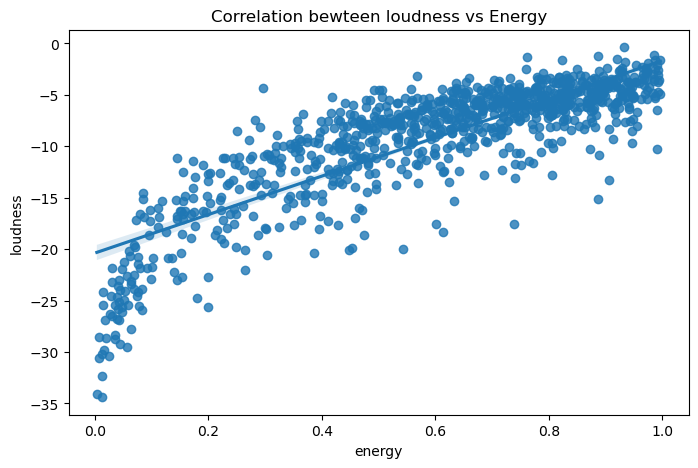

In [393]:
plt.figure(figsize=(8,5))
sns.regplot(data=sample_df, y= 'loudness', x = 'energy')
plt.title("Correlation bewteen loudness vs Energy")

In [377]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'duration_s'],
      dtype='object')

Text(0.5, 1.0, 'Correlation bewteen Popularity vs Acousticness')

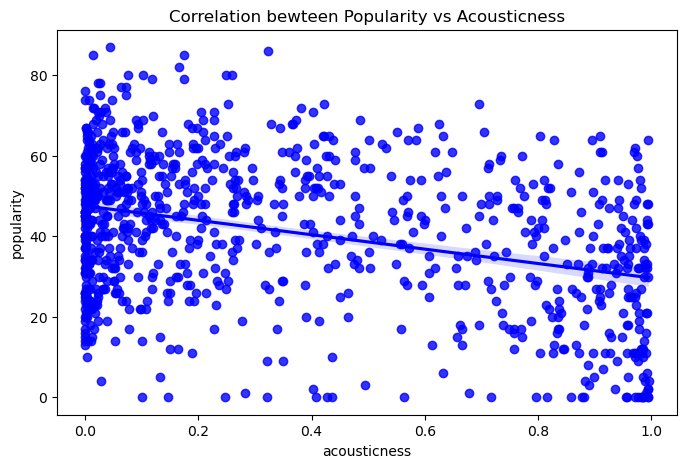

In [398]:
plt.figure(figsize=(8,5))
sns.regplot(data=sample_df, y= 'popularity', x = 'acousticness',color='b')
plt.title("Correlation bewteen Popularity vs Acousticness")

Text(0.5, 1.0, 'Correlation bewteen Danceability vs Valence')

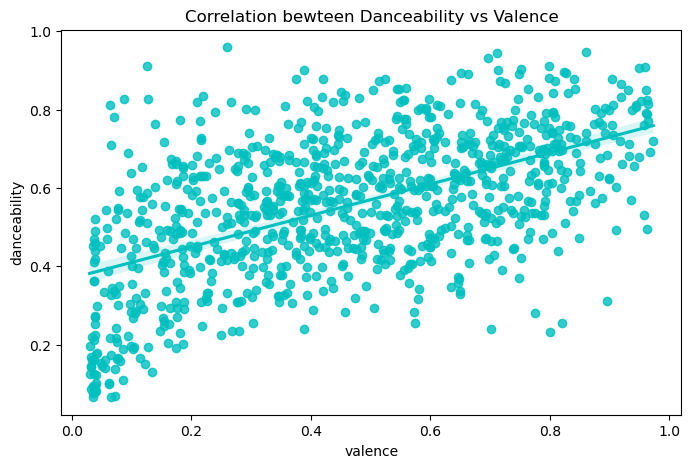

In [399]:
plt.figure(figsize=(8,5))
sns.regplot(data=sample_df, y= 'danceability', x = 'valence',color='c')
plt.title("Correlation bewteen Danceability vs Valence")

Text(0.5, 1.0, 'Correlation bewteen valence vs danceability')

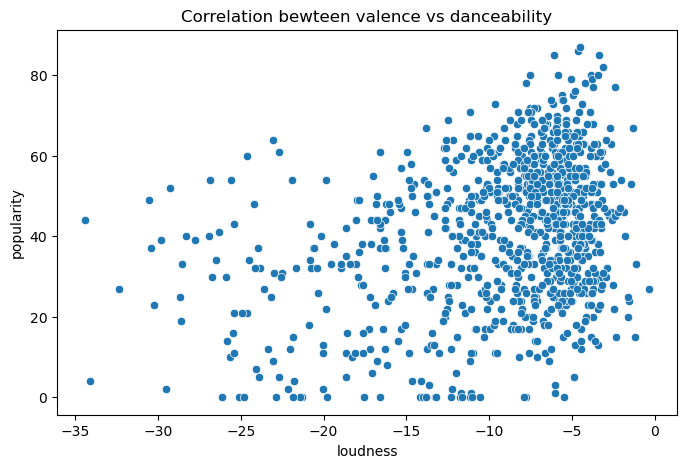

In [401]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df, y= 'popularity', x = 'loudness')
plt.title("Correlation bewteen valence vs danceability")

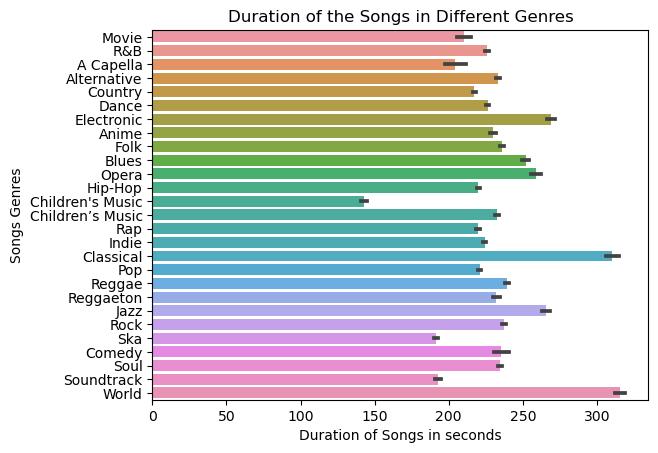

In [403]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(data = df, y = 'genre', x = 'duration_s')
plt.xlabel("Duration of Songs in seconds")
plt.ylabel("Songs Genres")
plt.show()

In [406]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize=(10,8))
famous = df['genre'].sort_values('popularity',ascending=False).head(10)
sns.barplot(data = famous, y = 'genre', x = 'popularity')
plt.show()

TypeError: Series.sort_values() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x800 with 0 Axes>

In [408]:
famous = df['genre'].sort_values('popularity',ascending=False).head(10)

TypeError: Series.sort_values() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

<Axes: xlabel='popularity', ylabel='Count'>

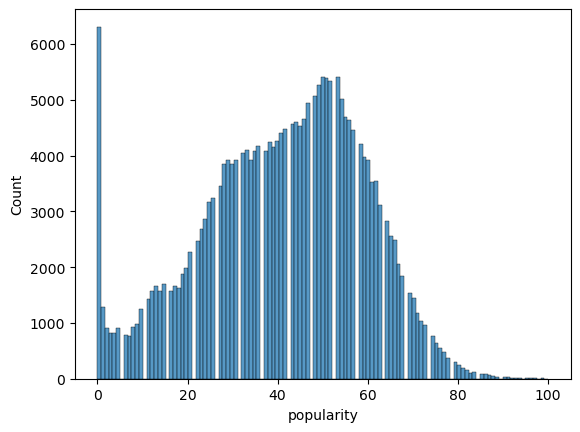

In [353]:
# Distribution of popularity column
sns.histplot(df['popularity'])

In [365]:
# Which genres are most common in the dataset.
df['genre'].mode()

0    Comedy
Name: genre, dtype: object

In [355]:
# Average values for acousticness, danceability, and energy across different genres
# Count the occurrences of each genre in the genre column.

In [ ]:
What are the correlations between different audio features?
Create a correlation heatmap to visualize the relationships between features like acousticness, danceability, energy, etc.
Is there a correlation between track popularity and other audio features?
Investigate how popularity correlates with features like energy, loudness, tempo, etc.

In [356]:
# Correlation between track popularity and other audio features
# Calculate the mean values of acousticness, danceability, and energy for each genre.

In [357]:
# Plot popularity against duration_ms to see if there’s any trend.

In [358]:
# Which artists have the most popular tracks?
# Identify the top artists based on the average popularity of their tracks.

In [359]:
#How do the audio features of popular tracks compare to less popular tracks?
#Compare the mean values of features like danceability, energy, and loudness for
# tracks above and below a certain popularity threshold.

In [360]:
# Can we cluster tracks based on their audio features?
# Use clustering algorithms like K-means to group tracks with similar audio features.

In [361]:
# Can we predict the genre of a track based on its audio features?
# Use classification algorithms to predict the genre based on features like danceability, energy, tempo, etc.

In [362]:
# What are the most common keys and time signatures in the dataset?
# Create bar plots to visualize the distribution of key and time_signature.

In [363]:
# How do different genres compare in terms of their audio features?
# Use box plots to compare features like loudness, tempo, and valence across different genres.